# GARCH Model

In [1]:
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
import sys

In [3]:
!{sys.executable} -m pip install arch


In [4]:
from arch import arch_model

In [5]:
# create dataset
n = 1000
omega = 0.5

alpha_1 = 0.1
alpha_2 = 0.2

beta_1 = 0.3
beta_2 = 0.4

test_size = int(n*0.1)

series = [gauss(0,1), gauss(0,1)]
vols = [1, 1]

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + alpha_2*series[-2]**2 + beta_1*vols[-1]**2 + beta_2*vols[-2]**2)
    new_val = gauss(0,1) * new_vol
    
    vols.append(new_vol)
    series.append(new_val)

Text(0.5, 1.0, 'Simulated GARCH(2,2) Data')

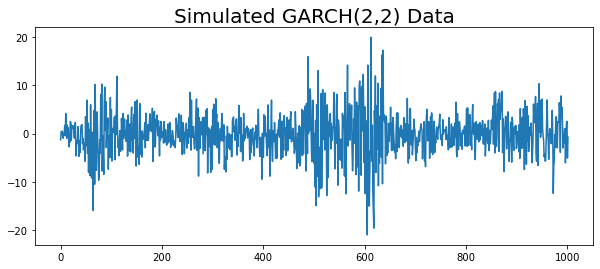

In [6]:

plt.figure(figsize=(10,4))
plt.plot(series)
plt.title('Simulated GARCH(2,2) Data', fontsize=20)

Text(0.5, 1.0, 'Data Volatility')

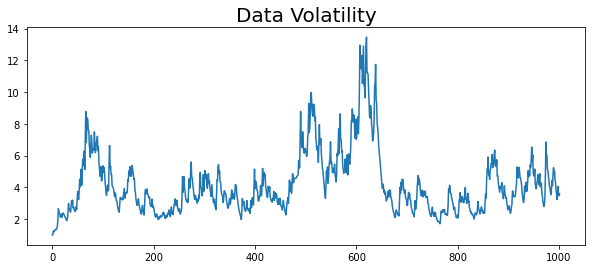

In [7]:
plt.figure(figsize=(10,4))
plt.plot(vols)
plt.title('Data Volatility', fontsize=20)

Text(0.5, 1.0, 'Data and Volatility')

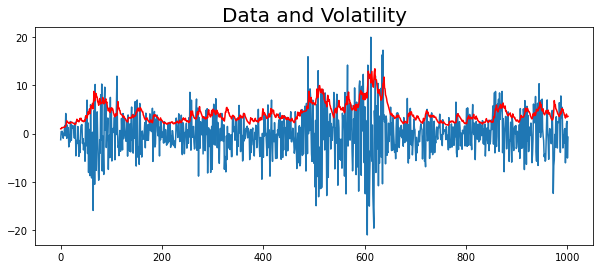

In [8]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.plot(vols, color='red')
plt.title('Data and Volatility', fontsize=20)

# PACF Plot

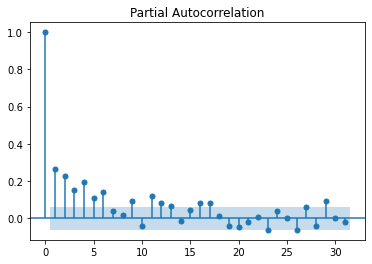

In [9]:
plot_pacf(np.array(series)**2)
plt.show()

# Fir the GARCH Model

In [10]:
train, test = series[:-test_size], series[-test_size:]

In [11]:
model = arch_model(train, p=2, q=2)

In [12]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 4623.111457323192
Iteration:      2,   Func. Count:     17,   Neg. LLF: 3979.1462820999254
Iteration:      3,   Func. Count:     26,   Neg. LLF: 2861.4645560980807
Iteration:      4,   Func. Count:     35,   Neg. LLF: 2804.0209069304296
Iteration:      5,   Func. Count:     44,   Neg. LLF: 2477.3662501314543
Iteration:      6,   Func. Count:     52,   Neg. LLF: 2470.67928741768
Iteration:      7,   Func. Count:     59,   Neg. LLF: 2471.6003216289987
Iteration:      8,   Func. Count:     67,   Neg. LLF: 2485.910144681158
Iteration:      9,   Func. Count:     76,   Neg. LLF: 2469.8730192490393
Iteration:     10,   Func. Count:     83,   Neg. LLF: 2469.871180105637
Iteration:     11,   Func. Count:     90,   Neg. LLF: 2469.8692452287532
Iteration:     12,   Func. Count:     97,   Neg. LLF: 2469.869240272117
Iteration:     13,   Func. Count:    104,   Neg. LLF: 2469.8692386390703
Iteration:     14,   Func. Count:    110,   Neg. LLF: 246

In [13]:

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2469.87
Distribution:                  Normal   AIC:                           4951.74
Method:            Maximum Likelihood   BIC:                           4980.57
                                        No. Observations:                  902
Date:                Tue, Jun 22 2021   Df Residuals:                      901
Time:                        18:39:28   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.1515      0.103     -1.473      0.141 [ -0.353,5.004e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.5286      0.188      2.809  4.972e-03    [  0.160,  0.897]
alpha[1]       0.0322  4.612e-02      0.698      0.485 [-5.818e-02,  0.123]
alpha[2]       0.1350  4.491e-02      3.006  2.651e-03  [4.696e-02,  0.223]
beta[1]        0.8059      0.216      3.738  1.852e-04    [  0.383,  1.228]
beta[2]        0.0000      0.199      0.000      1.000    [ -0.390,  0.390]
===========================================================================

Covariance estimator: robust
"""

# Predict

In [14]:
predictions = model_fit.forecast(horizon=test_size)

/opt/conda/lib/python3.9/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


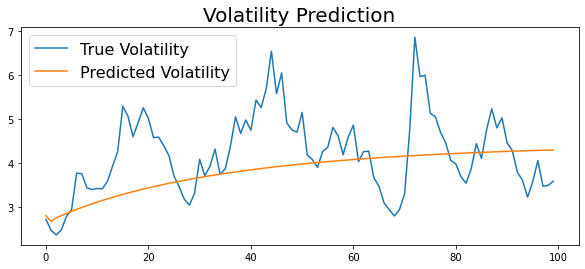

In [15]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

/opt/conda/lib/python3.9/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


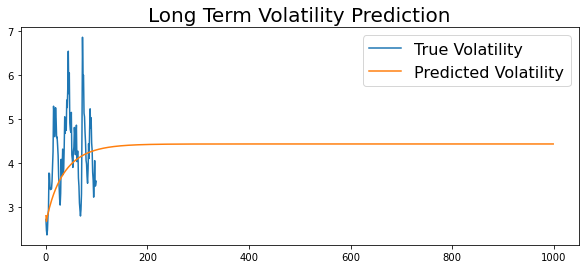

In [16]:
predictions_long_term = model_fit.forecast(horizon=1000)
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions_long_term.variance.values[-1, :]))
plt.title('Long Term Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

# Rolling forecast Origin

In [17]:
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

/opt/conda/lib/python3.9/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
/opt/conda/lib/python3.9/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
/opt/conda/lib/python3.9/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

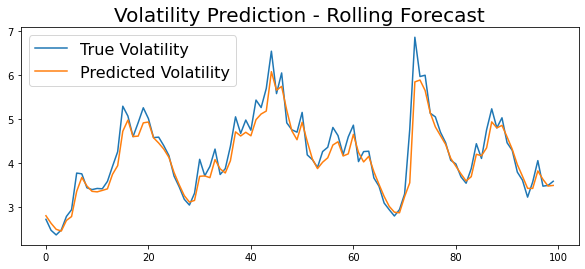

In [18]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)